In [135]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.datasets import fetch_olivetti_faces
import keras

model = VGG16(weights='imagenet', include_top=True)

In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# 224 * 224 * 3  : 150528   ->  25088

150528

(224, 224, 3)
float32


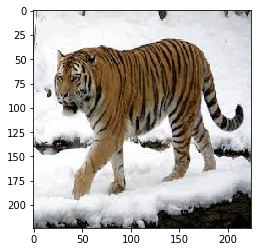

In [28]:
img_path = 'tiger.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img) # 0 ~ 255
print(x.shape)
print(x.dtype)
plt.imshow(x/255.0)

In [29]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [30]:
x = preprocess_input(x)

In [15]:
print(x.shape)

(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


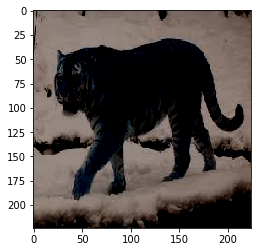

In [31]:
#print(x)
plt.imshow( x[0,:,:,:] / 255.0)

In [32]:
pred = model.predict(x)

(1, 1000)


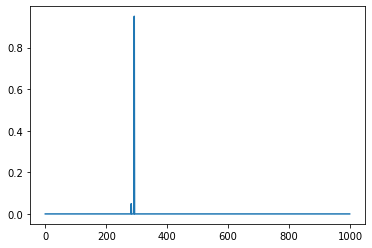

In [33]:
print(pred.shape)
plt.plot(pred[0,:])

In [34]:
print(np.argmax(pred))

292


In [54]:
r = decode_predictions(pred, top=3)[0]
print(r[0][1], r[0][2])

tiger 0.95088625


In [50]:
import json
json_data = json.load(open('imagenet_class_index.json'))
#print(json_data)
print(json_data["292"])

['n02129604', 'tiger']


In [53]:
json_data[f"{np.argmax(pred)}"][1]

'tiger'

In [65]:
img = cv2.imread('tiger.jpg')
img = cv2.resize(img, (224, 224))
img  = img.reshape(-1, 224, 224, 3)
print(img.shape)
img = preprocess_input(img)
pred = model.predict(img)
json_data[f"{np.argmax(pred)}"][1]

(1, 224, 224, 3)


'tiger'

In [81]:
# pip install googletrans
from googletrans import Translator
translator = Translator()
result = translator.translate('spotted salamander', dest="ko")
print(result.text)

더럽혀진 도롱뇽


In [82]:
def toKor(word) :
    word = word.replace("_", " ")
    translator = Translator()
    result = translator.translate(word, dest="ko")
    return result.text

In [75]:
result = toKor(json_data[f"{np.argmax(pred)}"][1])
print(result)

호랑이


In [ ]:
import time
hdict = []
for d in json_data :
    k = toKor(json_data[d][1])
    hdict.append(k)
    print(json_data[d][1], k)
    time.sleep(0.3)

In [111]:
import pickle
with open("hdict.bin","wb") as fw:
    pickle.dump(hdict, fw)

with open("hdict.bin","rb") as fr:
    hdict2 = pickle.load(fr)
print(hdict2)

['텐치', '금붕어', '백상아리', '범 상어', '귀상어', '전기 광선', '가오리', '수탉', '대단히', '타조', '불평', '금화', '집 핀치', '돌진', '인디고 깃발 천', '남자 이름', '벌불', '어치', '까치', '총칭', '물 우젤', '연', '대머리 독수리', '무자비한 사람', '큰 회색 올빼미', '유럽식 불 도롱뇽', '일반적인 영원', '이다', '더럽혀진 도롱뇽', 'Axolotl', '황소 개구리', '청개구리', '꼬리 개구리', '얼간이', '가죽 등 거북이', '진흙 거북', '테라 핀', '상자 거북', '줄무늬 게코', '일반적인 이구아나', '미국 카멜레온', '채찍 꼬리', '종교', '주름진 도마뱀', '악어 도마뱀', '미친 괴물', '녹색 도마뱀', '아프리카 카멜레온', '코모도 왕 도마뱀', '아프리카 악어', '미국 악어', '트리케라톱스', '천둥 뱀', '링넥 뱀', '돼지 뱀', '녹색 뱀', '왕 뱀', '가터 뱀', '물뱀', '포도 나무 뱀', '밤뱀', '좋은 압축', '바위 비단뱀', '인도 코브라', '그린 맘바', '바다뱀', '뿔이있는 독사', '다이아몬드 백', '사이드 와인 더', '삼엽충', '수확 자', '투석기', '검정색과 금색 정원 거미', '어린이 거미', '정원 거미', '블랙 위도우', '타란툴라 거미', '늑대 거미', '진드기', '지네', '검은 뇌조', '멧닭', '주름진 뇌조', '프레리 치킨', '공작', '메추라기', '자고', '아프리카 그레이', '앵무새', '유황 볏 앵무새', '진훙 잉꼬', '쿠칼', '꿀벌 먹는 사람', '코뿔새', '벌새', 'Jasmer', '큰 부리 새', '드레이크', '붉은 가슴의 인어', '거위', '검은 백조', '투스 커', '바늘 두더지', '오리너구리', '왈라비', '코알라', '웜뱃', '해파리', '말미잘', '뇌 산호', '편충', '선충류', '조가비', '달팽이', '강타', '바다 슬

In [84]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

model2 = ResNet50(weights='imagenet')

In [89]:
model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [90]:
img = cv2.imread('tiger.jpg')
img = cv2.resize(img, (224, 224))
img  = img.reshape(-1, 224, 224, 3)
print(img.shape)
img = preprocess_input(img)
pred = model2.predict(img)
r = json_data[f"{np.argmax(pred)}"][1]
r = toKor(r)
print(r)

(1, 224, 224, 3)
호랑이


In [91]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

model3 = InceptionV3(weights='imagenet')

In [ ]:
model3.summary()

In [ ]:
img = cv2.imread('result.jpg')
img = cv2.resize(img, (299, 299))
img  = img.reshape(-1, 299, 299, 3)
print(img.shape)

In [106]:
%%time
img = preprocess_input(img)
pred = model3.predict(img)

Wall time: 124 ms


In [105]:
r = json_data[f"{np.argmax(pred)}"][1]
r = toKor(r)
print(r)

디지털 시계


In [127]:
%%writefile server.py

import flask
from flask import Flask,render_template,url_for,request
import base64
import numpy as np
import cv2
from keras.models import load_model 
import io 
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import json
import tensorflow as tf
from keras import backend as K
import pickle


init_Base64 = 22   # data:image/png;base64, 로 시작하
app = Flask(__name__)

global model 
global sess
global graph

sess = tf.Session()       
graph = tf.get_default_graph() 
K.set_session(sess)

model = ResNet50(weights='imagenet')
with open("hdict.bin","rb") as fr:
    hdict = pickle.load(fr)

@app.route('/')
def home():
    return "ok~~~"


@app.route('/image', methods=['POST'])
def upload():       
    draw = request.form['photo_cap']
    draw = draw[init_Base64:]
    draw_decoded = base64.b64decode(draw)
    image = np.asarray(bytearray(draw_decoded), dtype="uint8")
    
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)    
    image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)                
    image = image.reshape(-1, 224, 224, 3)
    image = preprocess_input(image)
    
    with graph.as_default():
        K.set_session(sess)
        pred = model.predict(image)
        r = hdict[np.argmax(pred)]
        
    return f"인식결과:{r}"
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py


In [124]:
with open("hdict.bin","rb") as fr:
    hdict = pickle.load(fr)
print(hdict[192])

케른


# Data Augmentation

In [132]:
data_aug_gen = ImageDataGenerator(rescale=1./255) 

train_generator = data_aug_gen.flow_from_directory(
        'dataset/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.


In [136]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [137]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs= 5)

Epoch 1/5
15/15 [==============================] - 1s 34ms/step - loss: 1.1703 - accuracy: 0.4222
Epoch 2/5
15/15 [==============================] - 0s 20ms/step - loss: 0.3068 - accuracy: 0.9778
Epoch 3/5
15/15 [==============================] - 0s 19ms/step - loss: 0.0372 - accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 0s 21ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 5/5
15/15 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000


In [141]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'dataset/hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical', shuffle=False)

Found 15 images belonging to 3 classes.


In [142]:
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

0.4000000059604645


In [147]:
img = cv2.imread('cat.jpg')
img = np.expand_dims(img, 0)
print(img.shape)

(1, 414, 500, 3)


In [159]:
generator =ImageDataGenerator(rescale=1./255, width_shift_range = 0.2) 
obj = generator.flow(img, batch_size=1)   

In [162]:
image = next(obj)
#print(image)

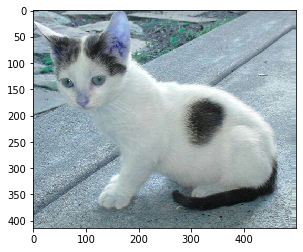

In [163]:
#print(image)
plt.imshow(image[0])

In [171]:
generator =ImageDataGenerator(rescale=1./255,
    horizontal_flip = True, vertical_flip = True, width_shift_range = 0.2, rotation_range=90, brightness_range=[0.8, 1.2],   
     zoom_range=[0.5, 1.5])

obj = generator.flow(img, batch_size=1)   

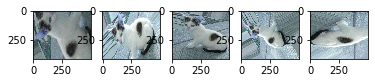

In [172]:
for i in range(5) :
    image = next(obj)
    plt.subplot(1,5, i+1)
    plt.imshow(image[0])

In [176]:
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=45,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest') 

obj = data_aug_gen.flow(img, batch_size=1)   

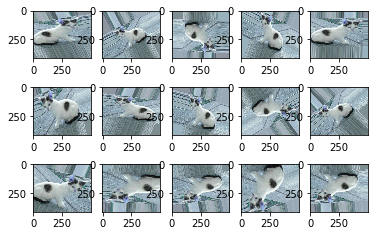

In [177]:
for i in range(15) :
    image = next(obj)
    plt.subplot(3,5, i+1)
    plt.imshow(image[0])

In [235]:
train_generator = data_aug_gen.flow_from_directory(
        'dataset/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=5,
        class_mode='categorical',
        save_to_dir='tmp',  
        save_prefix="image", save_format="jpg"
)

Found 45 images belonging to 3 classes.


In [245]:
result = next(train_generator)

In [232]:
image  = np.array(result[0])
label =  result[1]

In [233]:
print(image.shape)
print(label)

(5, 24, 24, 3)
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [246]:
train_generator = data_aug_gen.flow_from_directory(
        'dataset/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=5,
        class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [259]:
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=45,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest') 
train_generator = data_aug_gen.flow_from_directory(
        'dataset/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=5,
        class_mode='categorical'
)

model.fit_generator(
        train_generator,
        steps_per_epoch=5,
        epochs= 30)

Found 45 images belonging to 3 classes.
Epoch 1/30
5/5 [==============================] - 0s 21ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 2/30
5/5 [==============================] - 0s 23ms/step - loss: 0.0321 - accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 0s 18ms/step - loss: 0.0444 - accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 0s 34ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 0s 18ms/step - loss: 0.0312 - accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 0s 18ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 0s 18ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/30
5/5 [==============================] - 0s 34ms/step - loss: 0.1910 - accuracy: 0.9200
Epoch 9/30
5/5 [==============================] - 0s 18ms/step - loss: 0.1084 - accuracy: 0.9600
Epoch 10/30
5/5 [==============================] - 0s 19ms/step - loss: 0.0224 - accura

In [258]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'dataset/hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical', shuffle=False)

scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

Found 15 images belonging to 3 classes.
0.7333333492279053


# 사용자 정의 함수

In [264]:
def myFunc(image):
    converted_img = image / 255
    return converted_img

test_datagen = ImageDataGenerator(rescale = None,
                        preprocessing_function=myFunc)
test_generator = test_datagen.flow_from_directory(
             'dataset/hard_handwriting_shape/test',
                    target_size=(5,5), color_mode='grayscale')

img = next(test_generator )

Found 15 images belonging to 3 classes.


In [378]:
from random import *

class CustomDataGenerator(ImageDataGenerator):
    def __init__(self,   red_range=None,       green_range=None,
               blue_range=None,    **kwargs):  
        super().__init__( preprocessing_function=self.augment_color,
                         **kwargs)

        self.red_range = red_range
        self.green_range = green_range
        self.blue_range = blue_range

    def augment_color(self, image):
        if randint(0,3) == 0 :
            image[:,:,1] = 0
            image[:,:,2] = 0        
        return image

In [289]:
class MyClass0 :
    def __init__(self, v) :
        print("hello", v)
        
class MyClass :
    def __init__(self , *args, **kwargs) :
        #print(kwargs.get("e"))        
        print(args)
        print(kwargs)
        
class MyClass2 :
    def __init__(self, v) :
        self.v = v
        
A = MyClass0(80.9)
B = MyClass()
C = MyClass(r=10, g=20, b=30, d=323, e=[2,3])    #==>  {'r':10, 'g':20, 'b':30}
D = MyClass(45, 20)
E = MyClass(45, 20, r=10, g=20, b=30, d=323, e=[2,3])

F = MyClass2(20)
print(F.v)

hello 80.9
()
{}
()
{'r': 10, 'g': 20, 'b': 30, 'd': 323, 'e': [2, 3]}
(45, 20)
{}
(45, 20)
{'r': 10, 'g': 20, 'b': 30, 'd': 323, 'e': [2, 3]}
20


In [379]:
datagen = CustomDataGenerator(red_range=(0.8, 1.2),
                              green_range=(0.8, 1.2),
                              blue_range=(0.8, 1.2),
                              brightness_range=(0.5, 1.5),
                              horizontal_flip  = True,
                              )
img = cv2.imread('cat.jpg')
img = np.expand_dims(img, 0)
test_generator  = datagen.flow(img)

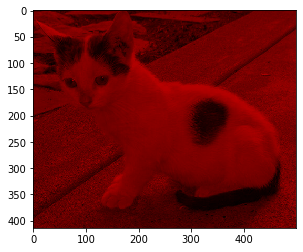

In [398]:
result = next(test_generator)
plt.imshow(result[0]/255)

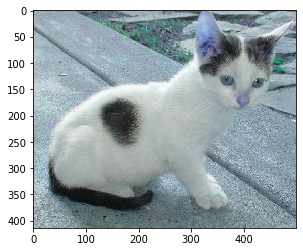

# 한글 OCR

In [399]:
import io 

csv_file_path = "dataset/korean/label_image_map.csv"
lable_file = "dataset/korean/label.txt"

csv_file = io.open(csv_file_path, 'r', encoding='utf-8')
labels_file = io.open(lable_file, 'r', encoding='utf-8').read().splitlines()

# Map characters to indices.
label_dict = {}
count = 0
for label in labels_file:
    label_dict[label] = count
    count += 1

# Build the lists.
filenames = []
labels = []

for row in csv_file:
    path, label = row.strip().split(',')
    filenames.append('./dataset/korean/' + path)
    labels.append(label_dict[label])

print("csv file load finished")

csv file load finished


In [401]:
#print(labels)
print(labels_file)

['가', '각', '간', '갇', '갈', '감', '갑', '값', '갓', '강', '갖', '같', '갚', '갛', '개', '객', '걀', '걔', '거', '걱', '건', '걷', '걸', '검', '겁', '것', '겉', '게', '겨', '격', '겪', '견', '결', '겹', '경', '곁', '계', '고', '곡', '곤', '곧', '골', '곰', '곱', '곳', '공', '과', '관', '광', '괜', '괴', '굉', '교', '구', '국', '군', '굳', '굴', '굵', '굶', '굽', '궁', '권', '귀', '귓', '규', '균', '귤', '그', '극', '근', '글', '긁', '금', '급', '긋', '긍', '기', '긴', '길', '김', '깅', '깊', '까', '깍', '깎', '깐', '깔', '깜', '깝', '깡', '깥', '깨', '꺼', '꺾', '껌', '껍', '껏', '껑', '께', '껴', '꼬', '꼭', '꼴', '꼼', '꼽', '꽂', '꽃', '꽉', '꽤', '꾸', '꾼', '꿀', '꿈', '뀌', '끄', '끈', '끊', '끌', '끓', '끔', '끗', '끝', '끼', '낌', '나', '낙', '낚', '난', '날', '낡', '남', '납', '낫', '낭', '낮', '낯', '낱', '낳', '내', '냄', '냇', '냉', '냐', '냥', '너', '넉', '넌', '널', '넓', '넘', '넣', '네', '넥', '넷', '녀', '녁', '년', '념', '녕', '노', '녹', '논', '놀', '놈', '농', '높', '놓', '놔', '뇌', '뇨', '누', '눈', '눕', '뉘', '뉴', '늄', '느', '늑', '는', '늘', '늙', '능', '늦', '늬', '니', '닐', '님', '다', '닥', '닦', '단', '닫', '달', '닭', '닮', '담', '답', '닷', '당',

In [402]:
from subprocess import check_output
import random

seed = 1998

shuffled_indices = list(range(len(filenames)))
random.seed(seed)
random.shuffle(shuffled_indices)
filenames = [ filenames[i] for i in shuffled_indices]
labels = [labels[i] for i in shuffled_indices]

print("List shuffle finished")

List shuffle finished


In [404]:
labels

[131,
 6,
 591,
 891,
 750,
 530,
 556,
 698,
 554,
 742,
 734,
 665,
 691,
 617,
 602,
 701,
 175,
 904,
 388,
 449,
 945,
 492,
 563,
 219,
 153,
 497,
 145,
 285,
 398,
 892,
 372,
 322,
 73,
 559,
 822,
 562,
 864,
 853,
 2,
 345,
 906,
 325,
 564,
 85,
 411,
 116,
 162,
 630,
 280,
 66,
 133,
 945,
 279,
 128,
 921,
 295,
 366,
 899,
 764,
 485,
 490,
 288,
 53,
 100,
 405,
 869,
 176,
 713,
 688,
 548,
 908,
 346,
 306,
 942,
 945,
 357,
 839,
 520,
 517,
 956,
 425,
 427,
 600,
 647,
 894,
 126,
 772,
 735,
 381,
 481,
 245,
 429,
 472,
 550,
 888,
 461,
 604,
 587,
 931,
 679,
 390,
 356,
 676,
 211,
 135,
 801,
 243,
 518,
 18,
 673,
 676,
 58,
 954,
 397,
 485,
 820,
 803,
 614,
 268,
 121,
 448,
 649,
 868,
 916,
 727,
 10,
 943,
 652,
 261,
 561,
 227,
 405,
 347,
 128,
 281,
 791,
 680,
 713,
 754,
 559,
 10,
 474,
 395,
 927,
 782,
 206,
 453,
 770,
 169,
 473,
 640,
 881,
 401,
 858,
 931,
 622,
 161,
 658,
 667,
 140,
 9,
 619,
 470,
 188,
 867,
 81,
 601,
 657,
 693,
 

131
6
591
891
750


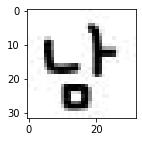

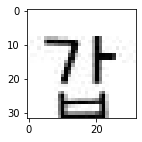

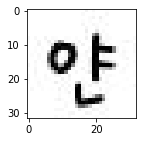

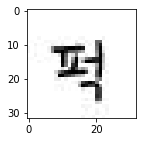

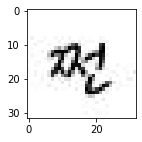

In [405]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0, 5):
    print(labels[i])
    
    img = mpimg.imread(filenames[i])
    
    plt.figure(figsize=(2, 2))
    plt.imshow(img, cmap ='gray')

In [406]:
import cv2

X_data = []

total_count = 0
prev_count = 0
  
for image_path in filenames:
    image = cv2.imread(image_path)
    X_data.append(image)
    total_count += 1
    
    if total_count - prev_count > 5000:
      prev_count = total_count
      print('{} images added...'.format(total_count))
    
print("Image adding finished")

5001 images added...
10002 images added...
15003 images added...
20004 images added...
25005 images added...
30006 images added...
35007 images added...
40008 images added...
45009 images added...
Image adding finished


In [407]:
import numpy as np
from sklearn.model_selection import train_test_split

r = 0.20
X = np.array(X_data)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = r)

print("X_data:", X.shape)
print("y_labels:", y.shape)
print("\nX_train:", X_train.shape)
print("X_val:", X_val.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)

X_data: (46060, 32, 32, 3)
y_labels: (46060,)

X_train: (36848, 32, 32, 3)
X_val: (9212, 32, 32, 3)
y_train: (36848,)
y_val: (9212,)


In [409]:
import keras.utils as utils


batch_size = 128
epochs = 3#300
num_classes = 980

y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

train_generator = ImageDataGenerator(rescale=1./255, 
                                     rotation_range=15, 
                                     width_shift_range=0.15, 
                                     height_shift_range=0.15, 
                                     shear_range=0.2, 
                                     zoom_range=[0.8, 1.2])

val_generator = ImageDataGenerator(rescale=1./255)

train_data_flow = train_generator.flow(X_train, y_train, 
                                       batch_size=batch_size)
val_data_flow = val_generator.flow(X_val, y_val,
                                   batch_size=batch_size)

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

In [412]:
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Dropout, Activation, Flatten


model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.50))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

RMSprop = keras.optimizers.RMSprop(lr=0.001)
                     
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop,
              metrics=['accuracy'])

In [ ]:
hist = model.fit_generator(train_data_flow,
                           epochs=8,
                           verbose=1,
                           steps_per_epoch = 230,
                           validation_data=val_data_flow,
                           validation_steps = 70)

Epoch 1/8
230/230 [==============================] - 74s 324ms/step - loss: 6.8887 - accuracy: 8.1522e-04 - val_loss: 6.8909 - val_accuracy: 5.5804e-04
Epoch 2/8
230/230 [==============================] - 75s 326ms/step - loss: 6.7341 - accuracy: 0.0032 - val_loss: 6.1077 - val_accuracy: 0.0103
Epoch 3/8
224/230 [============================>.] - ETA: 1s - loss: 6.0286 - accuracy: 0.0128